In [69]:
import pandas as pd
import numpy
import sklearn
import matplotlib

#import seaborn as sns

train_complete = pd.DataFrame(pd.read_csv('happiness_train_complete.csv',encoding = 'gbk'))
test_complete = pd.DataFrame(pd.read_csv('happiness_test_complete.csv',encoding ='gbk'))
data = train_complete.append(test_complete)
data.info(verbose=True,null_counts=True)
##data.head()
pd.set_option('display.max_rows', None)#显示全部行
pd.set_option('display.max_columns', None)#显示全部列


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10968 entries, 0 to 2967
Data columns (total 140 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10968 non-null  int64  
 1   happiness             8000 non-null   float64
 2   survey_type           10968 non-null  int64  
 3   province              10968 non-null  int64  
 4   city                  10968 non-null  int64  
 5   county                10968 non-null  int64  
 6   survey_time           10968 non-null  object 
 7   gender                10968 non-null  int64  
 8   birth                 10968 non-null  int64  
 9   nationality           10968 non-null  int64  
 10  religion              10968 non-null  int64  
 11  religion_freq         10968 non-null  int64  
 12  edu                   10968 non-null  int64  
 13  edu_other             6 non-null      object 
 14  edu_status            9399 non-null   float64
 15  edu_yr             

In [70]:
y_labels = data.loc[:,'happiness']
y_labels=y_labels.dropna(axis=0, inplace=False)
#将-8换成3
y_labels=y_labels.map(lambda x:3 if x==-8 else x)
#data.info(verbose= True,null_counts = True)
y_labels.value_counts()

4.0    4818
5.0    1410
3.0    1171
2.0     497
1.0     104
Name: happiness, dtype: int64

In [71]:
data_drop = data.drop(['edu_other','join_party','property_other','invest_other','happiness'],axis = 1)
data_drop.info(verbose= True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10968 entries, 0 to 2967
Data columns (total 135 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10968 non-null  int64  
 1   survey_type           10968 non-null  int64  
 2   province              10968 non-null  int64  
 3   city                  10968 non-null  int64  
 4   county                10968 non-null  int64  
 5   survey_time           10968 non-null  object 
 6   gender                10968 non-null  int64  
 7   birth                 10968 non-null  int64  
 8   nationality           10968 non-null  int64  
 9   religion              10968 non-null  int64  
 10  religion_freq         10968 non-null  int64  
 11  edu                   10968 non-null  int64  
 12  edu_status            9399 non-null   float64
 13  edu_yr                8212 non-null   float64
 14  income                10968 non-null  int64  
 15  political          

In [72]:
##缺失值填充 
data_drop['edu_status'] = data_drop['edu_status'].fillna(5)
data_drop["edu_yr"]=data_drop["edu_yr"].fillna(-2)
data_drop['social_neighbor'] = data_drop['social_neighbor'].fillna(8)
data_drop['social_friend'] = data_drop['social_friend'].fillna(8)
data_drop["work_status"]=data_drop["work_status"].fillna(0)
data_drop["work_yr"]=data_drop["work_yr"].fillna(0)
data_drop["work_type"]=data_drop["work_type"].fillna(0)
data_drop["work_manage"]=data_drop["work_manage"].fillna(0)
data_drop["family_income"]=data_drop["family_income"].fillna(-2)
data_drop["minor_child"]=data_drop["minor_child"].fillna(0)
data_drop["marital_1st"]=data_drop["marital_1st"].fillna(0)
data_drop["s_birth"]=data_drop["s_birth"].fillna(0)
data_drop["marital_now"]=data_drop["marital_now"].fillna(0)
data_drop["s_edu"]=data_drop["s_edu"].fillna(0)
data_drop["s_political"]=data_drop["s_political"].fillna(0)
data_drop["s_hukou"]=data_drop["s_hukou"].fillna(0)
data_drop["s_income"]=data_drop["s_income"].fillna(0)
data_drop["s_work_exper"]=data_drop["s_work_exper"].fillna(0)
data_drop["s_work_status"]=data_drop["s_work_status"].fillna(0)
data_drop["s_work_type"]=data_drop["s_work_type"].fillna(0)
data_drop["hukou_loc"]=data_drop["hukou_loc"].fillna(4)
data_drop.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10968 entries, 0 to 2967
Data columns (total 135 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10968 non-null  int64  
 1   survey_type           10968 non-null  int64  
 2   province              10968 non-null  int64  
 3   city                  10968 non-null  int64  
 4   county                10968 non-null  int64  
 5   survey_time           10968 non-null  object 
 6   gender                10968 non-null  int64  
 7   birth                 10968 non-null  int64  
 8   nationality           10968 non-null  int64  
 9   religion              10968 non-null  int64  
 10  religion_freq         10968 non-null  int64  
 11  edu                   10968 non-null  int64  
 12  edu_status            10968 non-null  float64
 13  edu_yr                10968 non-null  float64
 14  income                10968 non-null  int64  
 15  political          

In [73]:
#数据的处理

#异常值，主要是对一些数据进行分箱，减少异常值的影响，有必要
#首先是日期处理，取出年份即可
data_drop['survey_time'] = pd.to_datetime(data['survey_time'],format='%Y-%m-%d %H:%M:%S')
data_drop["weekday"]=data_drop["survey_time"].dt.weekday
data_drop["year"]=data_drop["survey_time"].dt.year
data_drop["quarter"]=data_drop["survey_time"].dt.quarter
data_drop["hour"]=data_drop["survey_time"].dt.hour
data_drop["month"]=data_drop["survey_time"].dt.month

data_drop['age'] = data_drop['year']-data_drop['birth']
data_drop = data_drop.drop(['survey_time','birth','weekday','year','quarter','hour','month','id'],axis=1)



In [74]:
#x_train = data_drop.iloc[:7000,:]
#y_train = y_labels[0:7000]
#x_val   = data_drop.iloc[7001:,:]
#y_val   = y_labels[7001:8000]
tests = data_drop.iloc[8000:,:]
data_drop_part = data_drop.iloc[:8000,:]
#data_drop_part.info(verbose = True,null_counts=True)
#tests.value_counts()


In [13]:
##构建模型---回归模型
#贝叶斯肯定不行，因为各维度之间不一定不相关，而且高维度不适合KNN和svm
#bp神经网络，随机森林，XGB，LGB可行

#首先是bp网络，处理成多分类模型，究极辣鸡
#利用决策树模型在二分类上进行训练和预测
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import metrics


##BP神经网络这里是分类，不太对劲，评价是mse
# 基础数组运算库导入
# 导入BP模型
from sklearn.neural_network import MLPClassifier
# 导入训练集分割方法
from sklearn.model_selection import train_test_split 
# 导入预测指标计算函数和混淆矩阵计算函数
from sklearn.metrics import classification_report, confusion_matrix
# 导入绘图包

import matplotlib


#分为训练集与测试集
x_train,x_val,y_train,y_val= train_test_split(data_drop_part,y_labels,test_size=0.2,random_state=42)#

# 建立 BP 模型, 采用Adam优化器，relu非线性映射函数
BP = MLPClassifier(solver='adam',activation = 'relu',max_iter = 1000,
                   alpha = 1e-3,hidden_layer_sizes = (128,64,64),random_state = 1)
# 进行模型训练
BP.fit(x_train, y_train)
# 进行模型预测
predict_val_labels = BP.predict(x_val)

print("验证集的真实标签:\n", y_val)
print("验证集的预测标签:\n", predict_val_labels)


#进行预测结果指标统计 统计每一类别的预测准确率、召回率、F1分数
print(classification_report(y_val, predict_val_labels))

result = pd.DataFrame(range(2968))
result['result'] = BP.predict(tests)
print('测试集预测:\n',result)
# 计算混淆矩阵
#confusion_mat = confusion_matrix(y_val, predict_val_labels)
# 混淆矩阵
#print(confusion_mat)
# 将混淆矩阵以热力图的方式显示
#sns.set()
#figure, ax = plt.subplots()
# 画热力图
#sns.heatmap(confusion_mat, cmap="YlGnBu_r", annot=True, ax=ax)  
# 标题 
#ax.set_title('confusion matrix')
# x轴为预测类别
#ax.set_xlabel('predict')  
# y轴实际类别
#ax.set_ylabel('true')  
#plt.show()

验证集的真实标签:
 2215    4.0
2582    5.0
1662    4.0
3027    1.0
4343    4.0
2680    4.0
1765    5.0
1123    3.0
4054    4.0
3761    4.0
1535    3.0
2944    4.0
2987    3.0
4291    4.0
4342    3.0
4424    5.0
7941    4.0
4997    3.0
2748    4.0
2302    4.0
3932    4.0
5956    5.0
6131    4.0
7596    4.0
794     5.0
3163    3.0
7940    4.0
3181    4.0
763     4.0
3078    4.0
811     4.0
7259    4.0
6931    4.0
1618    2.0
6826    4.0
1042    2.0
5318    2.0
4794    4.0
487     5.0
1017    4.0
2815    4.0
2716    4.0
5363    4.0
2929    5.0
3362    5.0
5165    4.0
1075    2.0
6398    5.0
4981    4.0
6228    5.0
2921    4.0
4019    4.0
4331    5.0
6999    5.0
1322    4.0
7731    3.0
2252    4.0
6654    3.0
7244    5.0
866     5.0
5591    5.0
2465    5.0
465     4.0
2882    2.0
4961    5.0
7042    3.0
6240    4.0
5447    4.0
1502    4.0
3915    3.0
3262    4.0
263     3.0
3806    4.0
4084    4.0
7839    4.0
1811    4.0
1144    4.0
5827    5.0
2149    3.0
3929    5.0
6319    4.0
3290    3.0
682  

In [ ]:
##随机森林，带K折交叉验证
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np


kfold = KFold(n_splits=15, shuffle = True, random_state= 12)
model = RandomForestRegressor(n_estimators=100, max_depth=15, max_features = None, random_state=0)
mse = []
i=0
X=data_drop_part
Y=y_labels
for train, test in kfold.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]j
    y_test = Y.iloc[test]
    model.fit(X_train,y_train)
    y_pred = model.predict(X=X_test)
    e = mean_squared_error(y_true=y_test,y_pred=y_pred)
    mse.append(e)
    print(e)
    i+=1
print("随机森林对应mse",np.mean(mse),mse)




In [ ]:
result['id'] = pd.DataFrame(range(8001,10968))

result['happiness'] = model.predict(tests).reshape(-1,1)
result = result.iloc[:,2:4]
result.to_csv("随机森林.csv",index=False)


#最终结果 0.48，垃圾，继续优化新方法

In [77]:
##接下来是XGB的回归
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
from sklearn.model_selection import cross_val_score as CVS,train_test_split as TTS

#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

xgb_params = {#'n_estimators':100,
              "booster":'gbtree','eta': 0.005, 
              'max_depth': 5, 'subsample': 0.8, 
              'colsample_bytree': 0.3, 
              'objective': 'reg:squarederror', 
              'eval_metric': 'rmse'
              }

folds = KFold(n_splits=5, shuffle=True, random_state=2018)

X_train = data_drop_part.reset_index(drop=True).values
y_train = y_labels.reset_index(drop=True).values.reshape(8000,1)
test = tests.reset_index(drop=True).values
oof_xgb = np.zeros(len(X_train))
predictions_xgb = np.zeros(len(test))
                                              
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=2940, evals=watchlist, early_stopping_rounds=200, 
                    verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
print("score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train)))

#初始结果0.45


[0]	train-rmse:3.45055	valid_data-rmse:3.43892
[100]	train-rmse:2.17152	valid_data-rmse:2.15840
[200]	train-rmse:1.42879	valid_data-rmse:1.41923
[300]	train-rmse:1.01707	valid_data-rmse:1.01694
[400]	train-rmse:0.80493	valid_data-rmse:0.81805
[500]	train-rmse:0.70142	valid_data-rmse:0.72964
[600]	train-rmse:0.65117	valid_data-rmse:0.69285
[700]	train-rmse:0.62385	valid_data-rmse:0.67731
[800]	train-rmse:0.60708	valid_data-rmse:0.67085
[900]	train-rmse:0.59443	valid_data-rmse:0.66750
[1000]	train-rmse:0.58426	valid_data-rmse:0.66569
[1100]	train-rmse:0.57507	valid_data-rmse:0.66455
[1200]	train-rmse:0.56664	valid_data-rmse:0.66337
[1300]	train-rmse:0.55887	valid_data-rmse:0.66277
[1400]	train-rmse:0.55143	valid_data-rmse:0.66202
[1500]	train-rmse:0.54448	valid_data-rmse:0.66163
[1600]	train-rmse:0.53781	valid_data-rmse:0.66106
[1700]	train-rmse:0.53152	valid_data-rmse:0.66058
[1800]	train-rmse:0.52545	valid_data-rmse:0.66036
[1900]	train-rmse:0.51950	valid_data-rmse:0.66030
[2000]	train

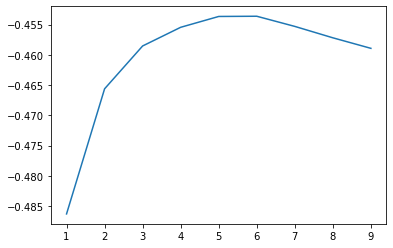

-0.45360988443127487 5


In [66]:
#学习曲线调参
from sklearn.metrics import mean_squared_error as MSE
from  xgboost import XGBRegressor as XGBR
from sklearn.model_selection import train_test_split

x = []
y=[]
xtrain_cvs,xtest_cvs,ytrain_cvs,ytest_cvs =train_test_split(X_train,y_train,train_size =0.3,random_state=40)
for i in np.arange(1,10,1):
    clf= XGBR(n_estimators =2940 ,booster='gbtree',eta= 0.005,
              max_depth= i, subsample= 0.8, 
              colsample_bytree= 0.3, 
              objective= 'reg:squarederror', 
              eval_metric= 'rmse',random_state=500)
    clf = clf.fit(xtrain_cvs,ytrain_cvs)
    clf = CVS(clf,X_train,y_train,scoring = 'neg_mean_squared_error',cv=5).mean()
    x.append(i)
    y.append(clf)
plt.figure()
plt.plot(x,y)
plt.show()
print(max(y),y.index(max(y)))


In [ ]:
#xgb的网格调参
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.005, 0.007,0.009,0.01]
subsample = [ 0.8, 0.85, 0.9, 0.95]
colsample_bytree = [0.8,0.85,0.9,0.95]
max_depth = [5,6]

nthread= [5,6,7]


parameters = {'learning_rate': learning_rate, 
              'max_depth': max_depth, 
              'subsample': subsample, 
              'colsample_bytree': colsample_bytree, 
              'nthread': nthread}
model = xgb.XGBRFRegressor(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1)
clf = clf.fit(X_train, y_train)

clf.best_params_




In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [78]:
result = pd.DataFrame(range(8001,10969))
result['id'] = pd.DataFrame(range(8001,10969))
#tests = pd.DataFrame(tests)
#tests= tests.reset_index(drop=True).values
result['happiness'] = np.array(predictions_xgb)
result.to_csv("XGB.csv",index=False)

In [47]:

########LGB
import lightgbm as lgb

param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 18, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,       
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(tests))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 1160
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], early_stopping_rounds = 100)#, verbose_eval=200
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(tests, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=18
[1]	training's l2: 0.677241	valid_1's l2: 0.626599
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.673916	valid_1's l2: 0.623993
[3]	training's l2: 0.670596	valid_1's l2: 0.621097
[4]	training's l2: 0.667781	valid_1's l2: 0.618881
[5]	training's l2: 0.664636	valid_1's l2: 0.616212
[6]	training's l2: 0.661534	valid_1's l2: 0.613834
[7]	training's l2: 0.658799	valid_1's l2: 0.61153
[8]	training's l2: 0.655741	valid_1's l2: 0.609204
[9]	training's l2: 0.652712	valid_1's l2: 0.607125
[10]	training's l2: 0.649901	valid_1's l2: 0.605136
[11]	training's l2: 0.647022	valid_1's l2: 0.60295
[12]	training's l2: 0.644326	valid_1's l2: 0.600754
[13]	training's l2: 0.641524	valid_1's l2: 0.59854
[14]	training's l2: 0.639025	valid_1's l2: 0.596496
[15]	training's l2: 0.636208	valid_1's l2: 0.594351
[16]	training's l2: 0.633486	valid_1's 

D:\anaconda\envs\py36\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\anaconda\envs\py36\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[27]	training's l2: 0.607123	valid_1's l2: 0.572733
[28]	training's l2: 0.605003	valid_1's l2: 0.571175
[29]	training's l2: 0.602886	valid_1's l2: 0.569819
[30]	training's l2: 0.600731	valid_1's l2: 0.568211
[31]	training's l2: 0.598481	valid_1's l2: 0.566594
[32]	training's l2: 0.596373	valid_1's l2: 0.56492
[33]	training's l2: 0.594526	valid_1's l2: 0.56355
[34]	training's l2: 0.592542	valid_1's l2: 0.562216
[35]	training's l2: 0.590387	valid_1's l2: 0.560694
[36]	training's l2: 0.588336	valid_1's l2: 0.559188
[37]	training's l2: 0.586667	valid_1's l2: 0.558026
[38]	training's l2: 0.584741	valid_1's l2: 0.556682
[39]	training's l2: 0.582883	valid_1's l2: 0.55535
[40]	training's l2: 0.580977	valid_1's l2: 0.554009
[41]	training's l2: 0.579027	valid_1's l2: 0.552539
[42]	training's l2: 0.577062	valid_1's l2: 0.551069
[43]	training's l2: 0.575257	valid_1's l2: 0.549635
[44]	training's l2: 0.573434	valid_1's l2: 0.548318
[45]	training's l2: 0.5718	valid_1's l2: 0.547029
[46]	training's l

In [ ]:
#学习曲线调参
from sklearn.metrics import mean_squared_error as MSE
from  lightgbm import LGBMRegressor as LGBR
from sklearn.model_selection import train_test_split

x = []
y=[]
xtrain_cvs,xtest_cvs,ytrain_cvs,ytest_cvs =train_test_split(X_train,y_train,train_size =0.3,random_state=40)
for i in np.arange(0.1,0.9,0.1):
    clf= LGBR(n_estimators = 1160,
          boosting_type = 'gbdt',
         num_leaves= 20,
         min_child_sample= 18, 
         objective='regression',
         max_depth=6,
         learning_rate= 0.01,
         min_child_samples= 30,       
         colsample_bytree= 0.8,
         subsample_freq= 1,
         subsample= 0.8 ,
         bagging_seed= 11,
         metric= 'mse',
         reg_alpha= 0.1,
         verbose= -1,
         force_col_wise=True
         )
    clf = clf.fit(xtrain_cvs,ytrain_cvs)
    clf = CVS(clf,X_train,y_train,scoring = 'neg_mean_squared_error',cv=5).mean()
    x.append(i)
    y.append(clf)
plt.figure()
plt.plot(x,y)
plt.show()
print(max(y),y.index(max(y)))

In [66]:
result = pd.DataFrame(range(8001,10969))
result['id'] = pd.DataFrame(range(8001,10969))
#tests = pd.DataFrame(tests)
#tests= tests.reset_index(drop=True).values
result['happiness'] = np.array(predictions_lgb)
result.to_csv("LGB.csv",index=False)

In [ ]:
## 定义参数取值范围
learning_rate = [0.005, 0.007,0.009,0.01]
subsample = [ 0.8, 0.85, 0.9, 0.95]
colsample_bytree = [0.8,0.85,0.9,0.95]
max_depth = [5,6]
nthread= [5,6,7]

parameters= {
         'num_leaves': [20,30],
         'min_data_in_leaf': [20] ,
         
         'max_depth':[6],
         'learning_rate': [0.01],
         "min_child_samples": [30],
         "feature_fraction": [0.8],
         "bagging_freq": [1],
         "bagging_fraction": [0.8] ,
         "bagging_seed": [11],
       
         "lambda_l1": [0.1],
         "verbosity": [-1]}

model = lgb.LGBMRegressor(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

In [51]:
####catboost
from catboost import Pool, CatBoostRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
from sklearn.model_selection import cross_val_score as CVS,train_test_split 
from sklearn.model_selection import train_test_split


X_train = data_drop_part.reset_index(drop=True).values
y_train = y_labels.reset_index(drop=True).values.reshape(8000,1)
#test = tests.reset_index(drop=True).values
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_, y_train_, test_size=0.3, random_state=2019)
# train_pool = Pool(X_train_s, y_train_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# val_pool = Pool(X_test_s, y_test_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# test_pool = Pool(X_test_ ,cat_features=[0,2,3,10,11,13,15,16,17,18,19]) 



In [52]:

kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train))
predictions_cb = np.zeros(len(test))
kfold = kfolder.split(X_train, y_train)
fold_=0
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.3, random_state=2019)
for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_))
    fold_=fold_+1
    k_x_train = X_train[train_index]
    k_y_train = y_train[train_index]
    k_x_vali = X_train[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'iterations': 1100,
         'loss_function': 'RMSE',
         'eval_metric':'RMSE',
         'learning_rate': 0.02,
         'depth': 6,
         'use_best_model': True,
         'subsample': 0.7,
         'bootstrap_type': 'Bernoulli',
         'reg_lambda': 3
    }
    model_cb = CatBoostRegressor(**cb_params)
    #train the model
    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100)#,early_stopping_rounds=200
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(tests, ntree_end=model_cb.best_iteration_) / kfolder.n_splits



print("CV score: {:<8.8f}".format(mean_squared_error(oof_cb, y_train)))

fold n°0
0:	learn: 0.8222846	test: 0.7860847	best: 0.7860847 (0)	total: 9.16ms	remaining: 10.1s
100:	learn: 0.6964894	test: 0.6894209	best: 0.6894209 (100)	total: 312ms	remaining: 3.08s
200:	learn: 0.6650340	test: 0.6750409	best: 0.6750409 (200)	total: 582ms	remaining: 2.6s
300:	learn: 0.6460031	test: 0.6697770	best: 0.6697770 (300)	total: 847ms	remaining: 2.25s
400:	learn: 0.6297928	test: 0.6669780	best: 0.6667569 (389)	total: 1.11s	remaining: 1.94s
500:	learn: 0.6140142	test: 0.6652351	best: 0.6652351 (500)	total: 1.42s	remaining: 1.7s
600:	learn: 0.5981540	test: 0.6639830	best: 0.6639830 (600)	total: 1.73s	remaining: 1.44s
700:	learn: 0.5832826	test: 0.6635515	best: 0.6631680 (660)	total: 2s	remaining: 1.14s
800:	learn: 0.5695300	test: 0.6627680	best: 0.6627053 (798)	total: 2.28s	remaining: 850ms
900:	learn: 0.5566216	test: 0.6622692	best: 0.6622452 (899)	total: 2.5s	remaining: 553ms
1000:	learn: 0.5442571	test: 0.6622161	best: 0.6621973 (914)	total: 2.75s	remaining: 272ms
1099:	lea

0:	learn: 0.8139933	test: 0.8139933	best: 0.8139933 (0)	total: 2.55ms	remaining: 2.8s
1000:	learn: 0.4268217	test: 0.4268217	best: 0.4268217 (1000)	total: 1.88s	remaining: 186ms
1099:	learn: 0.4074907	test: 0.4074907	best: 0.4074907 (1099)	total: 2.07s	remaining: 0us

bestTest = 0.4074906825
bestIteration = 1099

0:	learn: 0.8111911	total: 2.42ms	remaining: 2.66s
1:	learn: 0.8078181	total: 5.28ms	remaining: 2.9s
2:	learn: 0.8049867	total: 7.76ms	remaining: 2.84s
3:	learn: 0.8018733	total: 9.93ms	remaining: 2.72s
4:	learn: 0.7993788	total: 12ms	remaining: 2.63s
5:	learn: 0.7966918	total: 14.5ms	remaining: 2.64s
6:	learn: 0.7942445	total: 16.8ms	remaining: 2.62s
7:	learn: 0.7913161	total: 19ms	remaining: 2.6s
8:	learn: 0.7887641	total: 21.4ms	remaining: 2.59s
9:	learn: 0.7862843	total: 23.5ms	remaining: 2.56s
10:	learn: 0.7840062	total: 25.9ms	remaining: 2.56s
11:	learn: 0.7819957	total: 59.3ms	remaining: 5.37s
12:	learn: 0.7798458	total: 61.6ms	remaining: 5.15s
13:	learn: 0.7777664	tota

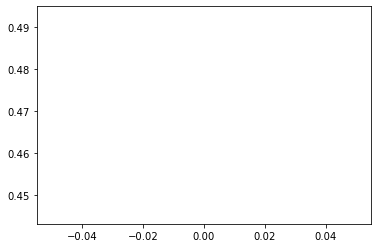

0.46904219941933817 0


In [19]:
#学习曲线调参
from sklearn.metrics import mean_squared_error as MSE
from  catboost import CatBoostRegressor as CBBR
from sklearn.model_selection import train_test_split

x = []
y=[]
xtrain_cvs,xtest_cvs,ytrain_cvs,ytest_cvs =train_test_split(X_train,y_train,train_size =0.3,random_state=40)
for i in np.arange(1):
    clf= CBBR(n_estimators= 1100,
         loss_function='RMSE',
         eval_metric='RMSE',
         learning_rate= 0.02,
         depth= 6,
         #use_best_model= True,
         subsample= 0.7,#eval_set=[(xtrain_cvs,ytrain_cvs)],
         bootstrap_type= 'Bernoulli',
         reg_lambda= 3)
    clf = clf.fit(xtrain_cvs,ytrain_cvs,eval_set=[(xtrain_cvs,ytrain_cvs)],verbose=1000)#,early_stopping_rounds=50
    mse=MSE(clf.predict(xtest_cvs),ytest_cvs)
    clf = CVS(clf,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3).mean()
    #print(clf)
    x.append(i)
    y.append(mse)
plt.figure()
plt.plot(x,y)
plt.show()
print(max(y),y.index(max(y)))

In [64]:
#result = pd.DataFrame(range(8001,10969))
#result['id'] = pd.DataFrame(range(8001,10969))
#tests = pd.DataFrame(tests)
#tests= tests.reset_index(drop=True).values
result['happiness'] = np.array(predictions_cb)
result.to_csv("CGB.csv",index=False)

In [ ]:
from sklearn import linear_model
# 将lgb和xgb和cb的结果进行stacking(不是对模型stacking)
train_stack = np.vstack([oof_lgb,oof_xgb,oof_cb]).transpose()
test_stack = np.vstack([predictions_lgb, predictions_xgb,predictions_cb]).transpose()


folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    #print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = linear_model.BayesianRidge()
    #clf_3 =linear_model.LassoCV()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_stack, y_train)))


In [89]:
result['id'] = pd.DataFrame(range(8001,10969))
tests = pd.DataFrame(tests)
tests= tests.reset_index(drop=True).values
result['happiness'] = predictions
result.to_csv("融合.csv",index=False)